# Машинное обучение, DS-поток
## Задание ML.1

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 30 баллов;
* Задача 3 &mdash; 70 баллов;
* Задача 4 &mdash; 80 баллов.

----

In [137]:
# Bot check

# HW_ID: ds_ml1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.filterwarnings("ignore")

---
## Задача 1.

Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор для Ridge-регрессии. Что можно сказать о влиянии параметра регуляризации?

*Решение прикрепил отдельным файлом (1.pdf)*

---
## Задача 2.

Исследуем Elastic-регрессию.

**1.** Визуализируйте множество, которое ограничивает коэффициенты в Elastic-регрессии.

*В Elastic-регрессии модель штрафуется и за L1, и за L2 норму весов (с некоторым коэффициентом). Поэтому коэффициенты регрессии ограничены $\alpha \cdot L1_{ratio} \cdot ∥\theta∥_1 + \alpha \cdot (1-L1_{ratio}) \cdot ∥\theta∥_2^2 = const$. Визуализировать удобно 2D случай при фиксированной силе регуляризации $\alpha=1$, т.е. $L1_{ratio} \cdot (|\theta_1|+|\theta_2|) +   (1-L1_{ratio}) \cdot (\theta_1^2 + \theta_2^2) = const$*

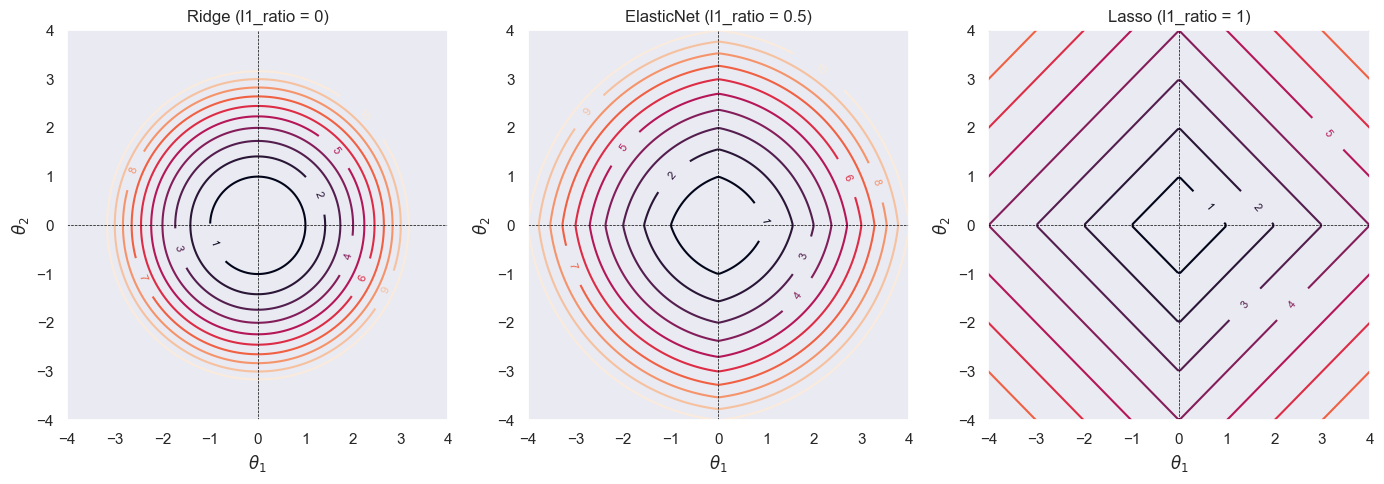

In [139]:
fig, axs = plt.subplots(1, 3, figsize=(14,5))
for l1_ratio, name, ax in zip([0,0.5,1], ['Ridge','ElasticNet','Lasso'], axs.flatten()):
    X, Y = np.meshgrid(np.linspace(-10, 10, 400), np.linspace(-10, 10, 400))
    Z = l1_ratio * (np.abs(X) + np.abs(Y)) + (1-l1_ratio) * (X**2 + Y**2)
    contour = ax.contour(X, Y, Z, levels=list(range(1,11)))  # границы области допустимых коэффициентов регрессии при разных const
    ax.clabel(contour, inline=True, fontsize=8)
    ax.set_title(f'{name} (l1_ratio = {l1_ratio})')
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.axhline(0, color='black', lw=0.5, ls='--')
    ax.axvline(0, color='black', lw=0.5, ls='--')
    ax.grid()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
plt.tight_layout()
plt.show()

*На графике наглядно видно, что коэффициенты Ridge-регрессии $(L1_{ratio}=0)$ ограничены окружностями, коэффициенты Lasso-регрессии $(L1_{ratio}=1)$ - ромбами, а ElasticNet - это нечтно среднее между Lasso и Ridge $($в примере выше: $L1_{ratio}=0.5)$*

**2.** Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор.

Какой вы можете видеть эффект при изменении параметра регуляризации и в чем
его отличие от лассо-регрессии?

**3.** Выпишите формулы для градиентного и стохастического спуска

---
## Задача 3.

Вам предлагается сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://dasl.datadescription.com/datafile/cost-of-living-2018/?_sfm_cases=539+541">`cost of living 2018`</a>, в которых используйте следующие столбцы:
* `City` &mdash; город, данные для которого приводятся.
* `Cost of Living Index` &mdash; является относительным показателем цен на потребительские товары, включая продукты, рестораны, транспорт и коммунальные услуги. Cost of Living Index не включает расходы на проживание, такие как аренда или ипотека. Если город имеет индекс стоимости жизни 120, это означает, что Numbeo оценивает его на 20% дороже, чем Нью-Йорк.

* `Rent Index` &mdash; это оценка цен на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, Numbeo оценивает, что цена аренды в этом городе в среднем на 20% меньше, чем цена в Нью-Йорке.

* `Cost of Living Plus Rent Index` &mdash; это оценка цен на потребительские товары, включая арендную плату, по сравнению с Нью-Йорком.

* `Restaurant Price Index` &mdash; сравнение цен на блюда и напитки в ресторанах и барах по сравнению с Нью-Йорк.

* `Local Purchasing Power Index` &mdash; показывает относительную покупательную способность при покупке товаров и услуг в данном городе за среднюю заработную плату в этом городе. Если внутренняя покупательная способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой по Нью-Йорку.

* `Groceries Index` &mdash; это оценка цен на продукты в городе по сравнению с Нью-Йорком. Для расчета этого раздела Number использует веса товаров в разделе "Рынки" для каждого города.

In [140]:
features = [
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
]
target = 'Groceries Index'
data = pd.read_csv('cost-of-living-2018.txt', sep='\t', usecols=[*features, target])
data.head(3)

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,145.43,110.87,128.76,143.47,158.75,112.26
1,141.25,66.14,105.03,149.86,135.76,142.70
2,134.83,71.70,104.38,138.98,129.74,130.96


**1.** Задача заключается в построении предсказания `Groceries Index` по известным значениям остальных параметров. Разделите данные на признаки $X$ и таргет $y$.

In [141]:
X, y = data[features], data[target]
print(X.shape, y.shape)

(540, 5) (540,)


Разбейте данные на обучающую и тестирующие выборки в соотношении 7:3 с помощью `train_test_split`</a> из sklearn. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

***Ответ:***  
*Стандартизация помогает избавиться от размерности. Методы с регуляризацией штрафуют модель за большую норму весов, но если веса в разном масштабе, то они оказывают несопоставимый вклад в лосс и штрафуются неодинаково.*

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, **обученный на обучающей выборке**.

In [143]:
scaler = StandardScaler()
scaler.fit(X_train)  # обучаем на трейне
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

*Можно обучать с fit_intercept=True или стандартизировать таргет, но я буду далее обучать с fit_intercept=True (у таргета наоборот удобно сохранять размерность, чтобы получать сразу готовый предикт (без постобработки и обратного преобразования)*

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Для Elastic также исследуйте зависимость от параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

In [144]:
def draw_alpha(model, log_min, log_max, num, X=X_train, y=y_train, title='', figsize=(12, 6)):
    """Строит график зависимости значений весов модели от силы регуляризации"""
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():  # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        coefs.append(model.coef_)
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
    ax.set_xscale('log')
    plt.xlabel('alpha', fontsize=19)
    plt.ylabel('Веса', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=15)
    plt.axis('tight')
    plt.show()

def draw_l1_ratio(model, lin_min, lin_max, num, X=X_train, y=y_train, title='', figsize=(12, 6)):
    """Строит график зависимости значений весов модели от l1_ratio"""
    l1_ratios = np.linspace(lin_min, lin_max, num)   
    coefs = []
    for a in l1_ratios:
        model.set_params(l1_ratio=a)
        model.fit(X, y)
        coefs.append(model.coef_)
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(l1_ratios, coef, linewidth=2, label=label)
        ind += 1
    plt.xlabel('l1_ratio', fontsize=19)
    plt.ylabel('Веса', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=15)
    plt.axis('tight')
    plt.show()

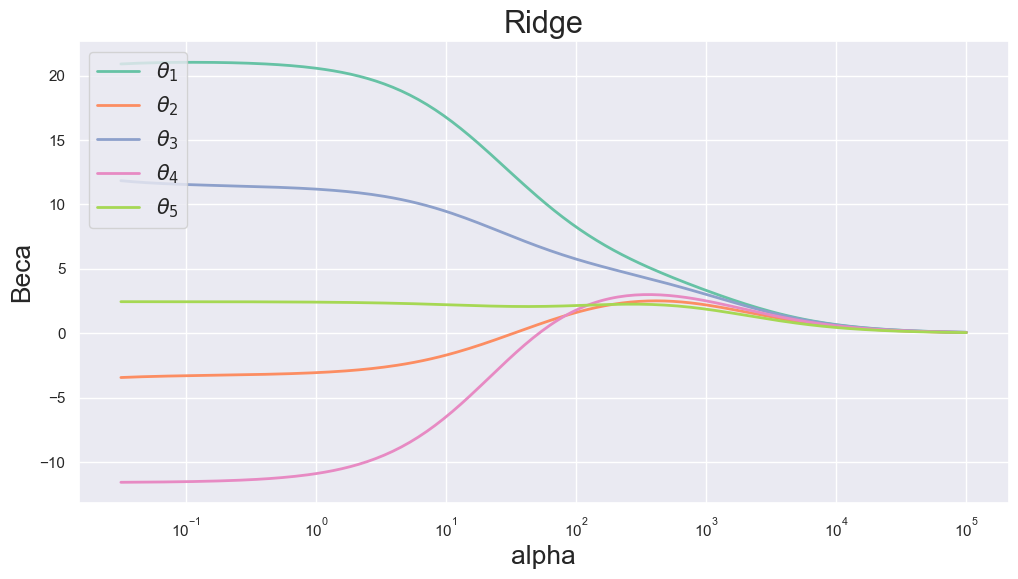

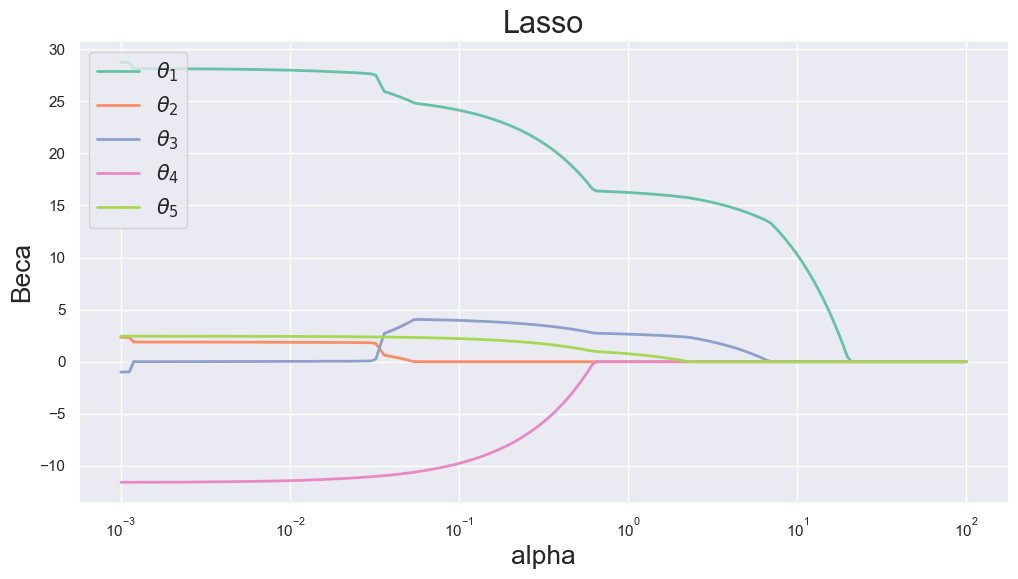

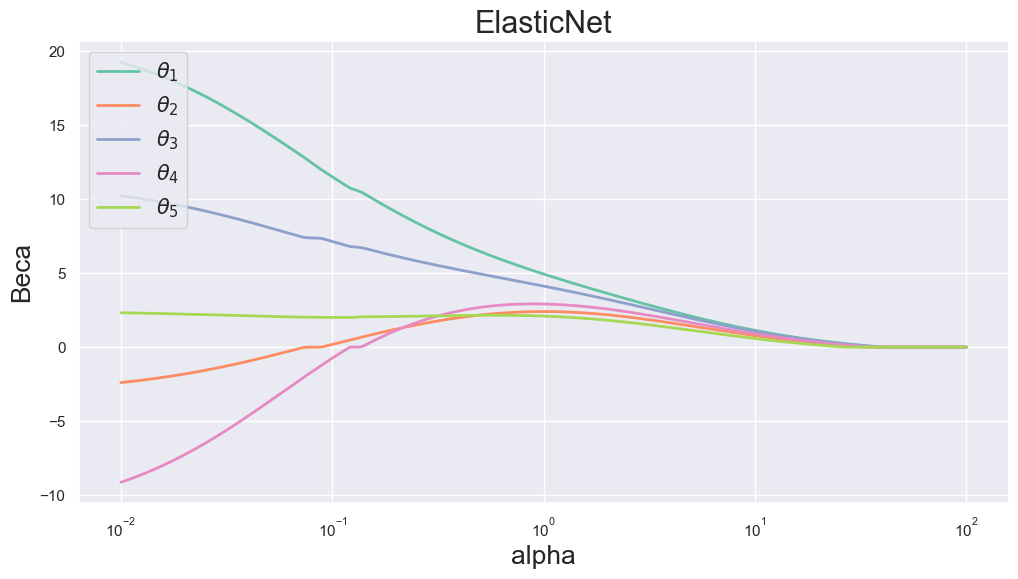

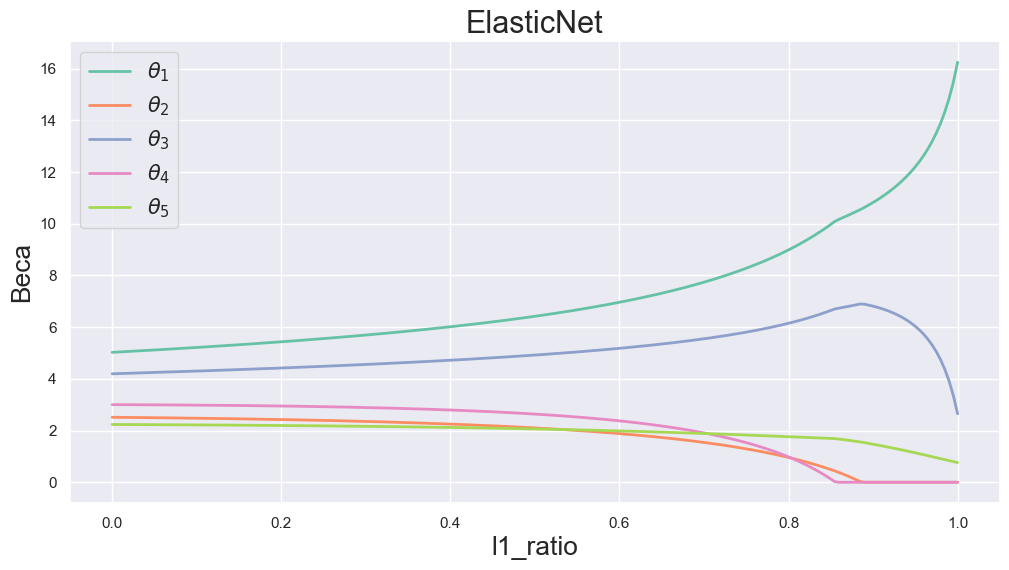

In [145]:
draw_alpha(Ridge(fit_intercept=True, max_iter=1000), -1.5, 5, 200, title='Ridge')
draw_alpha(Lasso(fit_intercept=True, max_iter=1000), -3, 2, 200, title='Lasso')
draw_alpha(ElasticNet(fit_intercept=True, max_iter=1000, l1_ratio=1/3), -2, 2, 200, title='ElasticNet')
draw_l1_ratio(ElasticNet(fit_intercept=True, max_iter=1000), 0, 1, 200, title='ElasticNet')  # варьируем l1_ratio при дефолтном alpha=1

***Промежуточный вывод:***  
  
*1) Оптимальная сила регуляризации $\alpha$ у Ridge-регрессии лежит в диапазоне $(10,10^3)$. При $\alpha > 10^3$ веса начинают зануляться, а при $\alpha < 10$ регуляризации почти не происходит*  
*2) Оптимальная $\alpha$ у Lasso лежит в диапазоне $(0.1,10)$. При $\alpha > 10$ остался только 1 ненулевой коэффициент (слишком простая модель), а при $\alpha < 0.1$ регуляризации почти нет и отобрать полезные признаки не получится*  
*3) Оптимальная $\alpha$ у ElasticNet лежит в диапазоне $(0.1,10)$ (причины те же: при меньших $\alpha$ регуляризация слишком слаба, а при больших - зануляются веса)*  
*4) Оптимальное значение l1_ratio у ElasticNet по графику можно установить лишь примерно: оно $< 0.8$*   
  
*Предположу, что в любом случае лучше использовать Lasso-регрессию, т.к. по итогу получится провести отбор признаков (модель упростится + появится инсайт о значимости признаков)*  

Расчитайте индекс обусловленности для МНК-решения. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра (силы) регуляризации для Ridge-регрессии. 

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>При печати оптимальных значений метрики нет округления. Комм. При показе чисел с плавающей точкой нам не нужны все знаки, которые могут быть напечатаны. Используйте форматирование. Например, print(f"{value:.5f}"). (-3.0)</i>

In [146]:
condition_number = np.linalg.cond(X_train)
print(f'{condition_number:.2f}')

13000.164520119044


<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

*Очень большое значение $\Rightarrow$ можно утверждать мультиколлинеарность*

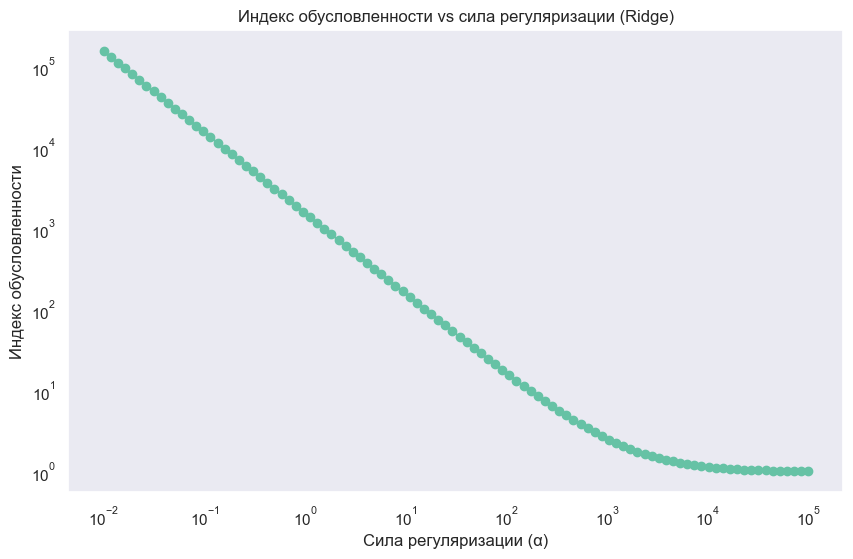

In [147]:
alphas = np.logspace(-2, 5, 100)
condition_numbers = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, fit_intercept=True)
    ridge_model.fit(X_train, y_train)
    ridge_matrix = X_train.T @ X_train + alpha * np.eye(X_train.shape[1])
    condition_number_ridge = np.linalg.cond(ridge_matrix)  # индекс обусловленности для коэффициентов регрессии
    condition_numbers.append(condition_number_ridge)

plt.figure(figsize=(10,6))
plt.plot(alphas, condition_numbers, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Индекс обусловленности vs сила регуляризации (Ridge)')
plt.xlabel('Сила регуляризации (α)')
plt.ylabel('Индекс обусловленности')
plt.grid()
plt.show()

*Видно, что регуляризация помогает бороться с мультиколлинеарностью признаков: чем сильнее регуляризация, тем ниже индекс обусловленности*  
*У этого эффекта есть наглядная интерпретация. Число обусловленности показывает, насколько функция чувствительна к изменениям на входе. Когда происходит оверфит или есть мультиколлинеарность, график начинает очень сильно колебаться (очень больших значений достигает производная). К примеру, если наметить 5 случайных точек на плоскости и подогнать полином 20й степени, то через каждую точку кривая пройдет почти вертикально (производная не ограничена). А производная линейной функции по x_i это просто вес w_i. Регуляризация же ограничивает норму весов, так что колебания графика уменьшаются и максимально допустимая производная ограничивается. Поэтому чем больше сила регуляризации альфа, тем ниже число обусловленности*

**3.** На обучающей выборке с помощью поиска по сетке определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE).

*Замечание.* Не забудьте, что при стандартизации была использована вся обучающая выборка, а внутри кросс-валидации на каждой итерации рассматривается своя валидационная выборка, которая не должна стандартизироваться по данным, посчитанным частично на ней самой. Вам может помочь [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Используйте его в качестве аргумента model

In [148]:
models = {
    'ridge': (Ridge(fit_intercept=True, max_iter=1000), {'ridge__alpha': np.linspace(0, 5, num=10000)}),
    'lasso': (Lasso(fit_intercept=True, max_iter=1000), {'lasso__alpha': np.linspace(0, 5, num=10000)}),
    'elasticnet': (ElasticNet(fit_intercept=True, max_iter=1000), {
        'elasticnet__alpha': np.linspace(0, 5, num=1000),
        'elasticnet__l1_ratio': np.linspace(0, 0.5, num=10)
    }),
}

for name, (model, params) in models.items():
    gs = GridSearchCV(
        Pipeline([
            ('scaler', StandardScaler()),
            (name, model)
        ]), 
        params, 
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    )
    gs.fit(X_train, y_train)
    print('Лучшие гиперпараметры:', gs.best_estimator_)

Лучшие гиперпараметры: Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=2.54025402540254, max_iter=1000))])
Лучшие гиперпараметры: Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.11451145114511452))])
Лучшие гиперпараметры: Pipeline(steps=[('scaler', StandardScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.01001001001001001,
                            l1_ratio=0.16666666666666666))])


На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>При печати оптимальных значений метрики нет округления. Комм. При показе чисел с плавающей точкой нам не нужны все знаки, которые могут быть напечатаны. Используйте форматирование. Например, print(f"{value:.5f}"). (-3.0)</i>

In [149]:
opt_models = [
    Ridge(fit_intercept=True, max_iter=1000, alpha=2.54025402540254),
    Lasso(fit_intercept=True, max_iter=1000, alpha=0.11451145114511452),
    ElasticNet(fit_intercept=True, max_iter=1000, alpha=0.01001001001001001, l1_ratio=0.16666666666666666),
]
scores = []
for model in opt_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(round(MSE(y_test, y_pred),2))
scores = pd.DataFrame({'модель':['Ridge','Lasso','ElasticNet'], 'MSE':scores})
display(scores)

,модель,MSE
0,Ridge,34.396253
1,Lasso,34.305097
2,ElasticNet,34.688430


<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

*Лучший результат оказался у модели Lasso*

**4.** Сделайте общий вывод по задаче.

**Вывод:**  
*В рамках задачи удалось сравнить свойства типичных линейных моделей с регуляризацией: Ridge, Lasso, ElasticNet. Хотя Lasso в итоге показала наилучший результат, все подходы оказались сравнимыми по эффективности при оптимально подобранных гиперпараметрах. Удалось наглядно продемонстрироать, как с усилением регуляризации уменьшается проблема мультиколлинеарности, а также как штрафуются веса модели при разных подходах*

---
## Задача 4.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс, например, в `GridSearchCV`.

**1.** Задача оптимизации для регрессии Хьюбера выглядит следующим образом:
$$\large{\sum_{i=1}^n R(Y_i - x_i^T\theta) \rightarrow \min_\theta},$$
где $R(x) = \frac{x^2}{2} I\{|x| < c\} + c (|x| - \frac{c}{2})I\{|x| > c\}$ &mdash; функция потерь Хьюбера.

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

*Решение прикрепил отдельным файлом (4.pdf)*

**2.** Реализуем теперь класс

In [150]:
class HuberRegression(BaseEstimator):
    '''Линейная регрессия с лоссом Хьюбера'''
    
    def __init__(self, c=1, fit_intercept=True, max_iter=100, lr=3e-4, batch_size=128):
        '''
        :param c: константа c из определения функции потерь Хьюбера
        :param fit_intercept: добавлять ли константный признак
        :param max_iter: макс. количество итераций процедуры оптимизации
        :param lr: лернин рейт градиентного спуска
        :param batch_size: размер батча градиентного спуска
        '''
        self.c, self.fit_intercept, self.max_iter, self.lr, self.batch_size = c, fit_intercept, max_iter, lr, batch_size

    # def huber_loss(self, arg):
    #     return np.where(np.abs(arg) < self.c, 0.5 * arg ** 2, self.c * (np.abs(arg) - 0.5 * self.c))   
        
    def fit(self, X, y):
        '''
        Функция обучения модели.
        :param X: матрица признаков
        :param y: значения целевой паременной
        '''
        if self.fit_intercept:  # удобнее всего добавить столбец единиц и воспринимать self.intercept_ как вес для (n_features+1)-го признака
            X = np.concatenate([X, np.ones((X.shape[0],1))], axis=1)
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)      

        for _ in range(self.max_iter):
            # I = np.random.random_integers(0, n_samples-1, self.batch_size)  # данных мало, можно обойтись без mini-batch sgd
            X_I, y_I = X, y  #X[I,:], y[I]
            err = y_I - X_I @ self.coef_
            grad = np.where(np.abs(err) < self.c, -err, -self.c * np.sign(err))
            self.coef_ -= X_I.T @ (grad) / n_samples

        return self
        
    def predict(self, X):
        '''
        Функция применения модели.
        :param X: матрица признаков.
        :return pred: предсказание отклика для объектов из X
        '''
        if self.fit_intercept:  # удобнее всего добавить столбец единиц и воспринимать self.intercept_ как вес для (n_features+1)-ого признака
            X = np.concatenate([X, np.ones((X.shape[0],1))], axis=1)
        return X @ self.coef_

**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [151]:
train, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')
features, target = ['feature_1','feature_2','feature_3'], 'target'
X_train, y_train, X_test, y_test = train[features], train[target], test[features], test[target]

scaler = StandardScaler()
scaler.fit(X_train)  # обучаем на трейне
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)  # таргет не стандартизируем, вместо этого обучим модели с fit_intercept=True

train.head(3)

,feature_1,feature_2,feature_3,target
0,2.320800,-1.098571,0.117091,162.910894
1,0.625119,-0.782367,-0.813596,21.113006
2,-0.807648,-0.185054,-1.446535,-36.128990


Посмотрите на зависимость целевой переменной от каждого признака. Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

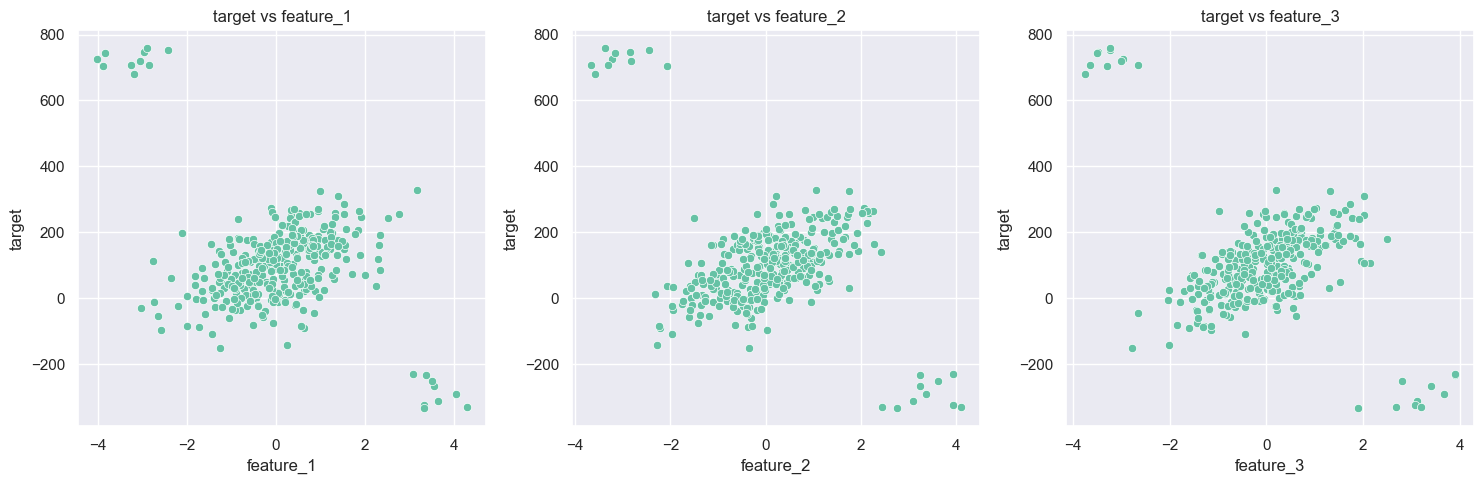

In [152]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=train[feature], y=y_train)
    plt.title(f'target vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('target')
plt.tight_layout()
plt.show()

*Судя по графикам выше, в данных могут быть выбросы. Выбросы способны "запутать" модель, перевешивая и не позволяя модели выучить интересующее нас распределение. Однако, используя HuberLoss, мы можем обойти эту проблему*

**4.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). Что можно сказать о качестве нашей модели?

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>При печати оптимальных значений метрики нет округления. Комм. При показе чисел с плавающей точкой нам не нужны все знаки, которые могут быть напечатаны. Используйте форматирование. Например, print(f"{value:.5f}"). (-1.0)</i>

In [153]:
lin_reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
print(f"{MSE(y_test, lin_reg.predict(X_test)):.2f}")

17025.806610128926

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

*Модель показала очень низкое качество, видимо, переобучишись на выбросы*

**5.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE. Что изменилось? 

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>При печати оптимальных значений метрики нет округления. Комм. При показе чисел с плавающей точкой нам не нужны все знаки, которые могут быть напечатаны. Используйте форматирование. Например, print(f"{value:.5f}"). (-1.0)</i>

In [154]:
hub_reg = HuberRegression(fit_intercept=True).fit(X_train, y_train)
print('{MSE(y_test, hub_reg.predict(X_test)):.2f}')

8270.68601552059

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

*Значение MSE заметно уменьшилось. Это подтерждает, что Huber Loss более устойчива к выбросам*

**6.** Используя поиск по сетке, подберите оптимальное значение гиперпараметра $c$ нашей модели. Какую метрику стоит использовать? Почему?

***Ответ:***  
*Следует использовать метрику neg_mean_absolute_error, потому что:*  
*а) GridSearchCV максимизирует переданную функцию (поэтому neg)*  
*б) MAE не так чувстительна к выбросам, как, например, MSE (MSE сама по себе чувствительна к выбросам, потому что растет квадратично). Поэтому, чтобы изучить качество модели (в данном случае - способность выучивать распределение, игнорируя выбросы) будет полезнее использовать MAE*  

In [155]:
gs = GridSearchCV(
    Pipeline([
        ('scaler', StandardScaler()),
        ('hub_reg', HuberRegression(fit_intercept=True))
    ]), 
    {'hub_reg__c': np.linspace(0, 100, num=1000)}, 
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
)
gs.fit(X_train, y_train)
print('Лучшие гиперпараметры:', gs.best_estimator_)

Лучшие гиперпараметры: Pipeline(steps=[('scaler', StandardScaler()),
                ('hub_reg', HuberRegression(c=7.007007007007007))])


<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>При печати оптимальных значений метрики нет округления. Комм. При показе чисел с плавающей точкой нам не нужны все знаки, которые могут быть напечатаны. Используйте форматирование. Например, print(f"{value:.5f}"). (-1.0)</i>

In [156]:
hub_reg = HuberRegression(fit_intercept=True, c=7).fit(X_train, y_train)  # обучим с оптимальными параметрами
print(f'{MSE(y_test, hub_reg.predict(X_test)):.2f}')

28.709980396812593

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

*Видно, что с оптимальным значением С результат стал еще лучше*

**7.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака. Что можно заметить на этих графиках?.

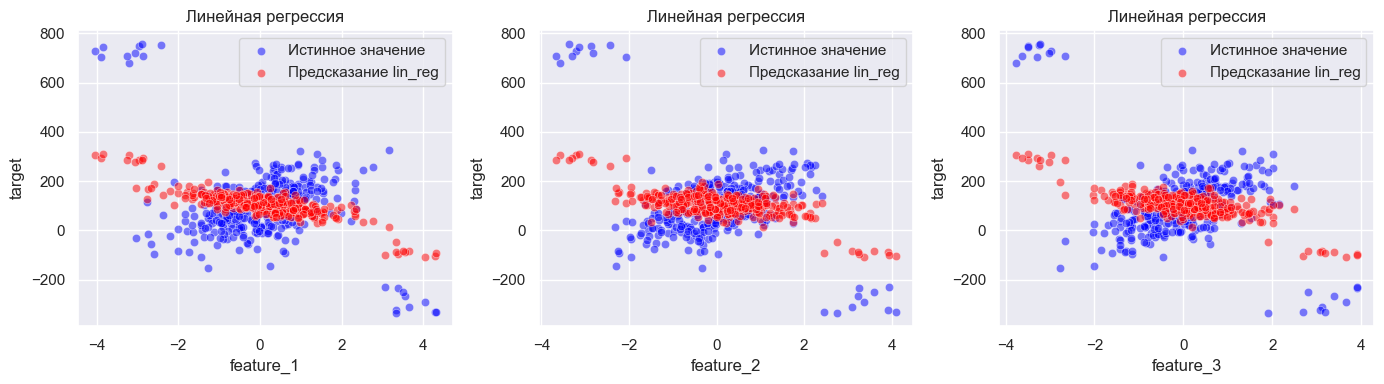

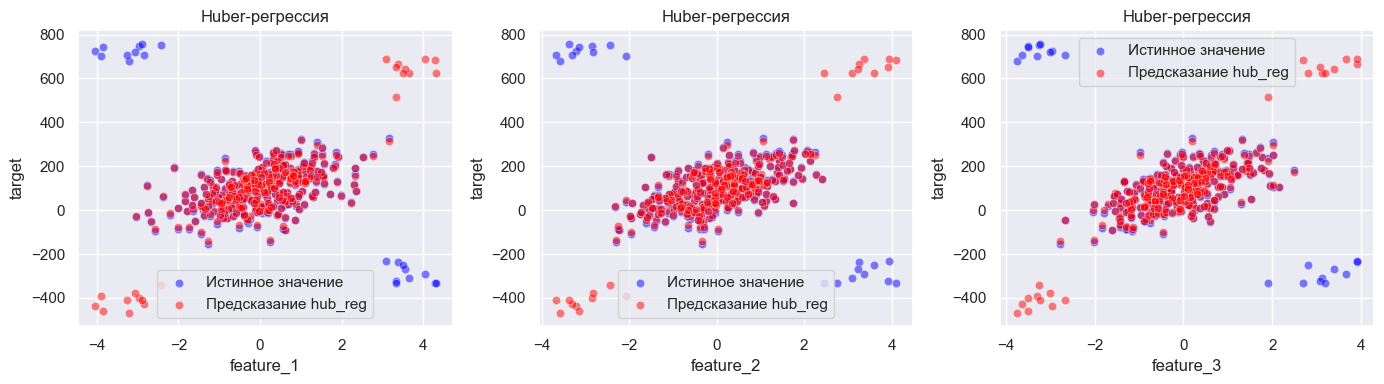

In [157]:
results = pd.DataFrame({
    'target': y_train,
    'lin_reg': lin_reg.predict(X_train),
    'hub_reg': hub_reg.predict(X_train),
})

for model in ['lin_reg', 'hub_reg']:
    plt.figure(figsize=(14, 4))
    for i, feature in enumerate(features):
        plt.subplot(1, len(features), i + 1)
        sns.scatterplot(x=train[feature], y=results['target'], color='blue', label='Истинное значение', alpha=0.5)
        sns.scatterplot(x=train[feature], y=results[model], color='red', label=f'Предсказание {model}', alpha=0.5)
        plt.title('Линейная регрессия' if model == 'lin_reg' else 'Huber-регрессия')
        plt.xlabel(f'{feature}')
        plt.ylabel('target')
    plt.tight_layout()
    plt.legend()
    plt.show()

**Вывод:**  
*В графиках на первой строке видно, насколько обычная лин.рег. чувстительна к выбросам. Вместо того, чтобы выучить интересующее нас распределение (центральная капля, где сосредоточена основная масса точек), линейная регрессия пытается учесть все выбросы, из-за чего предсказания искажаются.*  
*В графиках на второй строке видно, что Huber Loss позолил нам избежать этой проблемы и не выучивать шум. Теперь модель корректно покрыла центральную каплю и проигнорировала явные выбросы по краям*  
*Похоже, на практике стоит использовать Huber Loss, если известно, что в данных есть выбросы (и, например, нет возможности почистить их)*